# **Prudential Life Insurance Assessment**

***Predicting Insurance Risk Level of an insured based on their medical/personal details.***

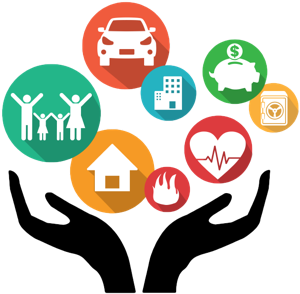

# **Introduction**


The importance of correct risk prediction cannot be overemphasized in Life insurance context. Life insurance company have to be careful about whom to insure and whom not to in order to stay financially solvent. While there is no perfect formula to determine the insurability, Actuarial tables have been traditionally used but they are quite time consuming. Predictive Analytics offers a promising alternative to the risk prediction task. 
Prudential is a US Insurer and is into Life insurance for last 140 years. There’s pattern observed by the company that on average only 40% of US population is having insurance. This is because of the time taking process that involves classification of each individual risks according to their medical history, background. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.


# **Business problem**

The goal of this problem is to develop a simplified predictive model for accurately determining the Risk level of life insurance applicants to make decision on their insurance approvals. In our task, we have 8 Risk levels with 1 being the lowest and 8 highest.

# **ML formulation of the business problem**

To solve the business problem using data science, it is needed to pose that problem as classical machine learning problem. First of all, since the data has target variable, it is supervised ML problem. Further we need to predict the risk level of insured. Hence it is a multi-class classification problem. Since
 we have 8 class labels.
 
In this Supervised Machine Learning problem we will try different feature engineering hacks and use different algorithms in order to predict the individual risk level.


# **Performance Metric**

The Evaluation Metric used as a part of this Task is “Quadratic
 weighted kappa”.

** Quadratic Weighted Kappa Metric
A weighted Kappa is a metric which is used to calculate the amount of similarity between predictions and actuals. A perfect score of 1.0 is granted when both the predictions and actuals are the same.
Whereas, the least possible score is -1 which is given when the predictions are furthest away from actuals.

# **Objective/Business Constraints**

* No low-latency requirement. But the model shouldn't take more than a minute
 to predict the risk level. 
* Model interpretablility is required. Probability of predicting the Risk level
 is useful. Since model predicting the correct Risk Level has direct impact
  on insurer portfolio.
* Predicting the values as close to actual so as to get KAPPA score
 close to 1.   

# **Data Description**

In this dataset, we are provided over a hundred variables describing attributes of life insurance applicants. The dataset is self anonymous where the attributes were grouped under six heads namely product info, family info, employment info, general health measurements , medical history info, and medical keyword(yes/No). The meaning of individual attributes under these group were unknown. There are over 127 independent variables. These variables are either Discrete, continuous or categorical in nature.

•	train.csv - the training set, contains the Response values

•	test.csv - the test set, you must predict the Response variable for all rows
 in this file

•	Id : A unique identifier associated with an application.

•	Product_Info_1-7 : A set of normalized variables relating to the product
 applied for

•	Ins_Age : Normalized age of applicant

•	Ht : Normalized height of applicant

•	Wt : Normalized weight of applicant

•	BMI : Normalized BMI of applicant

•	Employment_Info_1-6 : A set of normalized variables relating to the
 employment history of the applicant.

•	InsuredInfo_1-6 : A set of normalized variables providing information about
 the applicant.

•	Insurance_History_1-9 : A set of normalized variables relating to the
 insurance history of the applicant.

•	Family_Hist_1-5 : A set of normalized variables relating to the family
 history of the applicant.

•	Medical_History_1-41 : A set of normalized variables relating to the medical
 history of the applicant.

•	Medical_Keyword_1-48 : A set of dummy variables relating to the presence of 
 absence of a medical keyword being associated with the application.

•	Response : This is the target variable, an ordinal variable relating to the
 final decision associated with an application.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
import os
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 60)
from scipy import stats
from tqdm import tqdm, trange
from random import seed
from random import randrange

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading training data
train = pd.read_csv("/content/drive/MyDrive/PrudentialData/train.csv")
test = pd.read_csv("/content/drive/MyDrive/PrudentialData/test.csv")


In [4]:
#training data snapshot
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [5]:
def overview(dataframe):
    """This function will return the overview of the dataframe"""
    
    print("Shape of the dataframe is : {}".format(dataframe.shape))
    print("\n","**"*30,"\n")
    print("Information about features : ",dataframe.info())
    print("\n","**"*30,"\n")
    print("Total number of null values : \n ",dataframe.isnull().sum().sort_values(ascending=False))
    print("\n","**"*30,"\n")
    
    return dataframe.head(3)

In [6]:
print(overview(train))
floating_feature= [train.columns[i] for i in range(train.shape[1]) if train[train.columns[i]].dtypes =='float64'] 
print("\n","*"*30,"\n")
print("\nFloating Variables:\n", floating_feature)

integer_feature= [train.columns[i] for i in range(train.shape[1]) if train[train.columns[i]].dtypes =='int64'] 
print("\n","*"*30,"\n")
print("\nInteger Variables:\n", integer_feature)

categorical_feature= [train.columns[i] for i in range(train.shape[1]) if train[train.columns[i]].dtypes =='object'] 
print("\n","*"*30,"\n")
print("\nCategorical Variables:\n", categorical_feature)

Shape of the dataframe is : (59381, 128)

 ************************************************************ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB
Information about features :  None

 ************************************************************ 

Total number of null values : 
  Medical_History_10    58824
Medical_History_32    58274
Medical_History_24    55580
Medical_History_15    44596
Family_Hist_5         41811
                      ...  
Medical_Keyword_12        0
Medical_Keyword_13        0
Medical_Keyword_14        0
Medical_Keyword_15        0
Id                        0
Length: 128, dtype: int64

 ************************************************************ 

   Id  Product_Info_1  ... Medical_Keyword_48  Response
0   2               1  ...                  0         8
1   5               1  ...                  0         4
2   6          

As we can see above, the features which are Floating, integer and categorical
type. 
But in actual the categorical features are more than shown above. Since, the data provided to us is already encoded to integer and normalized also.

## Response Variable

In [7]:
#Response variable in training data.
Y=train['Response']
print("Percentage share of each Risk Level in our training data:\n")
Y.value_counts(normalize=True)*100

Percentage share of each Risk Level in our training data:



8    32.820262
6    18.916825
7    13.517792
2    11.033832
1    10.452838
5     9.147707
4     2.404810
3     1.705933
Name: Response, dtype: float64

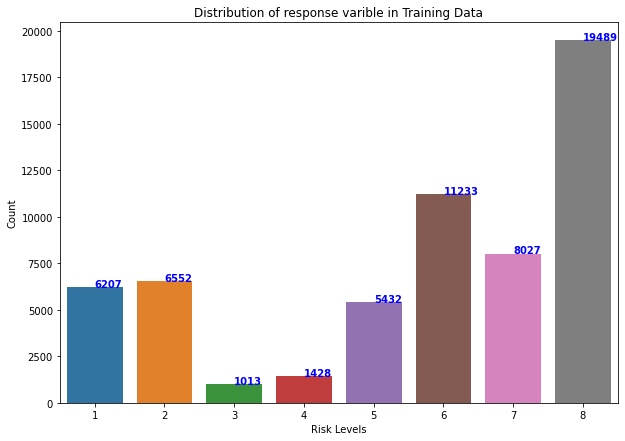

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
fig =sns.countplot(x= Y, ax=ax)
plt.title("Distribution of response varible in Training Data")
plt.xlabel("Risk Levels")
plt.ylabel("Count")
count= 0.00
for i in ax.patches:
  plt.text(count, i.get_height(),str((i.get_height())),fontsize = 10, fontweight ='bold',color ='blue')
  count+=1
plt.show()


We can see that distribution of response variable is imbalanced. We have 32% of
 insurance data classified as high risk i.e. level 8 and the lowest risk insured
 are around 10%.


  Whereas the insured with neutral risk i.e. 4 or 5 have around 2% and 9%
  respectively. With the lowest share of Risk level 3 being present in our
  data.

  Since the Distribution of Response variable is imbalanced we can perform
   SMOTE technique in order to generate synthetic samples of minority class 
   which will balance the classes in our data. 


In [11]:
##splitting train data into train and validate
train_final, cv_final = train_test_split(train, test_size=0.2, stratify = train['Response'], random_state=42)

print("Training data shape:",train_final.shape) 
print("Cross Validation data shape:",cv_final.shape) 

Training data shape: (47504, 128)
Cross Validation data shape: (11877, 128)


##Missing Values

In [13]:
##checking for the null values
#Top 15 columns in Training Data with Null values.
train_null_values= (train_final.isnull().sum()*100/train_final.shape[0]).sort_values(ascending=False)
print("Top 15 columns in Train Data with null values:\n\n",train_null_values[:15])

null_columns = [i for i,j in train_null_values.items() if j>0] 

Top 15 columns in Train Data with null values:

 Medical_History_10     99.090603
Medical_History_32     98.134894
Medical_History_24     93.541596
Medical_History_15     75.067363
Family_Hist_5          70.423543
Family_Hist_3          57.561469
Family_Hist_2          48.280145
Insurance_History_5    42.636410
Family_Hist_4          32.275177
Employment_Info_6      18.238464
Medical_History_1      14.929269
Employment_Info_4      11.403250
Employment_Info_1       0.033681
Medical_History_19      0.000000
Medical_History_7       0.000000
dtype: float64


In [14]:
train_null_values = dict(train_null_values)

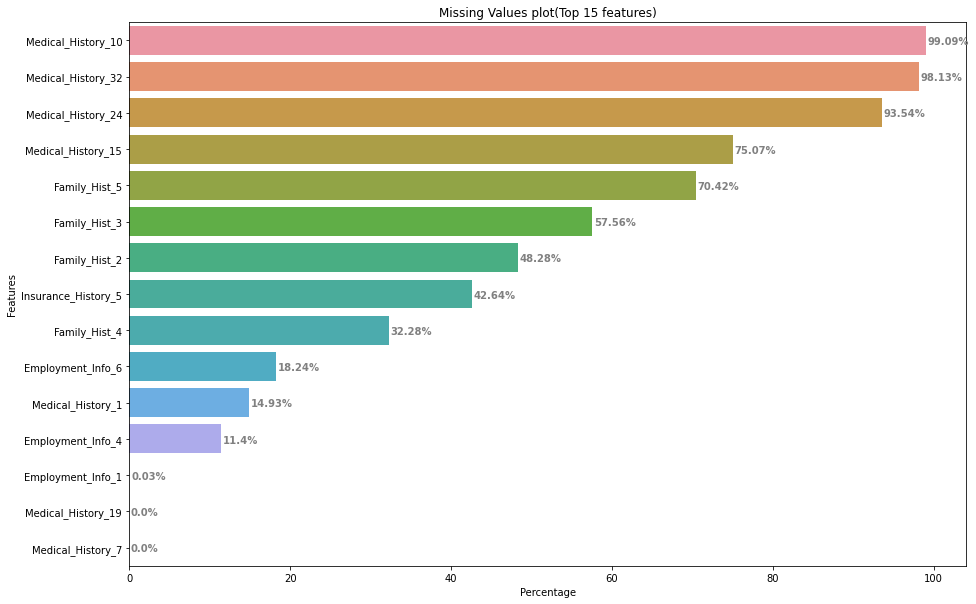

In [ ]:
fig, ax = plt.subplots(figsize= (15,10))
fig = sns.barplot(y= list(train_null_values.keys())[:15], x =list(train_null_values.values())[:15])
#annotate
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2))+"%",fontsize = 10, fontweight ='bold',color ='grey')

plt.title("Missing Values plot(Top 15 features)")
plt.ylabel("Features")
plt.xlabel("Percentage")
plt.show()

From the above plot we can see there are lot of missing values in our data so these can't be ignored otherwise it will be problematic while fitting the model.

There are two strategies we could follow in the case we encounter a missing value are:
* Removing the rows containing.
* Replacing the missing values.

We can't go with the first method because in our data we have some feature with over 90% of data missing.

Second method requires to fill missing value with either mean, median, mode or simply a predefined value.

But before imputing we will further analyse the pattern of missing values in our data. There are 3 categories of missing data:
1.   **MCAR** : The missing value is missing completely at random. The
      propensity for a data point to be missing does not have anything to do
      with its hypothetical value and with the values of other variables. 

2.   **MAR** : The missing value is missing due to some of the observed data.
      The propensity for a data point to be missing is not related to missing
      data, but it is related to some of the observed data.

3.   **MNAR** : The missing value is missing not at random. There are reasons
      for this. Often, the reasons are that the missing value depends on the
      hypothetical value or it is dependent on another variable’s value.


Since, we can analyse the pattern of missing values or check the dependency of one feature with other but we can't just check for dependency with some hypothetical value hence possiblility of MNAR rules out. We'll be checking for MCAR/MAR in our data.


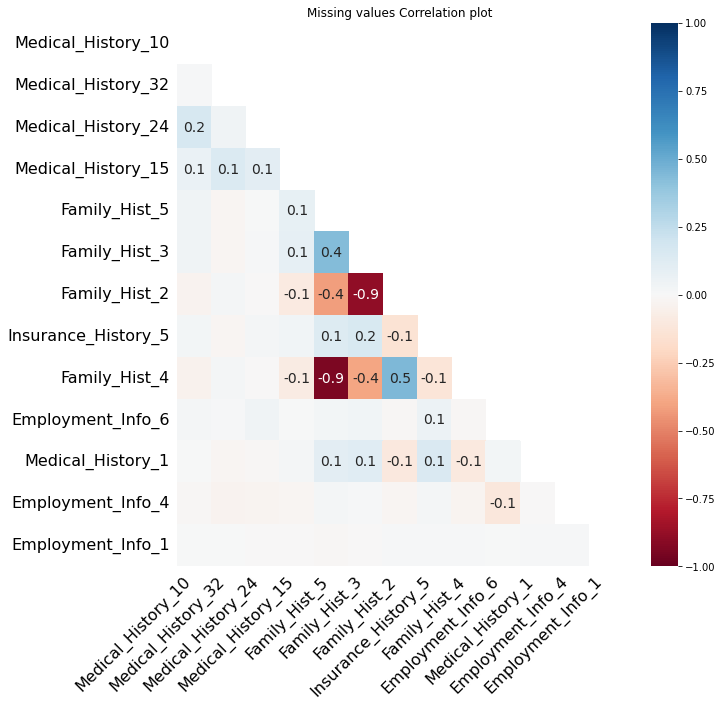

In [ ]:
# !pip install missingno
import missingno as msno
fig, ax =plt.subplots(figsize = (10,10))
fig =msno.heatmap(train_final[null_columns],ax=ax,)
ax.set_title("Missing values Correlation plot")
plt.show()

From the above plot showing the correlation between the missing values features. The *value near -1* means if one variable appears then the other variable is very likely to missing. A *value near 0* means there is no dependence between the occurence of missing values of two variables. 
A value near 1 means if one variable appears then the other variable is very likely to be present. 

In the above plot, **FamilyHist_2 and Family_hist_3 , Family_hist_4 and Family_hist_5 have high negative correlation between them, which means if one variables appears the other would most likely be missing.**

** Here, we have used MISSINGNO package available for missing values best
 visualization.


Since the features, Family_Hist_2 and Family_hist_3,  Family_hist_4 and
 Family_hist_5 have high negative correlation which confirms the presence of
  MACR or MAR hence we will remove one feature out of these pairs which has
   higher missing values i.e. Family_Hist_5 and Family_Hist_3.
   
Apart from these we will be removing features with more than 30% data missing.

In [15]:
## Dropped features
columns_dropped= []
columns_dropped.append(([i for i,j in train_null_values.items() if j>30]+['Family_Hist_3']))
print(columns_dropped[0])

['Medical_History_10', 'Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3', 'Family_Hist_2', 'Insurance_History_5', 'Family_Hist_4', 'Family_Hist_3']


In [16]:
## Creating copy of data without removing misssing values
train = train_final.copy()
cv = cv_final.copy()
test = test.copy()

train.fillna(-1, inplace=True)
cv.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

In [18]:
#removing missing data columns from train and test
def drop_cols(data, columns_dropped):
  data = data.drop(columns_dropped, axis=1)
  return data

train_final = drop_cols(train_final, columns_dropped[0])
cv_final = drop_cols(cv_final, columns_dropped[0])
test_final = drop_cols(test, columns_dropped[0])

# EDA

### Independent variables



---



---


Now, we will dig deep into the Independent Fetures data give to us so as to
 understand the relationship between independent and dependent feature.


 We have features based on following categories:

*   Product Information
*   Insured Age
*   Height
*   Weight
*   BMI
*   Employment Information
*   Insured Information
*   Insurance History
*   Family History
*   Medical History
*   Medical Keyword





In [19]:
#combining column names of same category
product_info =      [i for i in train_final.columns if 'Product_Info' in str(i)]
employment_info =   [i for i in train_final.columns if 'Employment_Info' in str(i)]
insured_info =      [i for i in train_final.columns if 'InsuredInfo' in str(i)]
insurance_history = [i for i in train_final.columns if 'Insurance_History' in str(i)]
family_history =    [i for i in train_final.columns if 'Family_Hist' in str(i)]
medical_history =   [i for i in train_final.columns if 'Medical_History' in str(i)]
medical_keyword =   [i for i in train_final.columns if 'Medical_Keyword' in str(i)]

### Multivariate Analysis

#### Except Medical_keyword/Medical_History

In [ ]:
train_final.dtypes

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 119, dtype: object

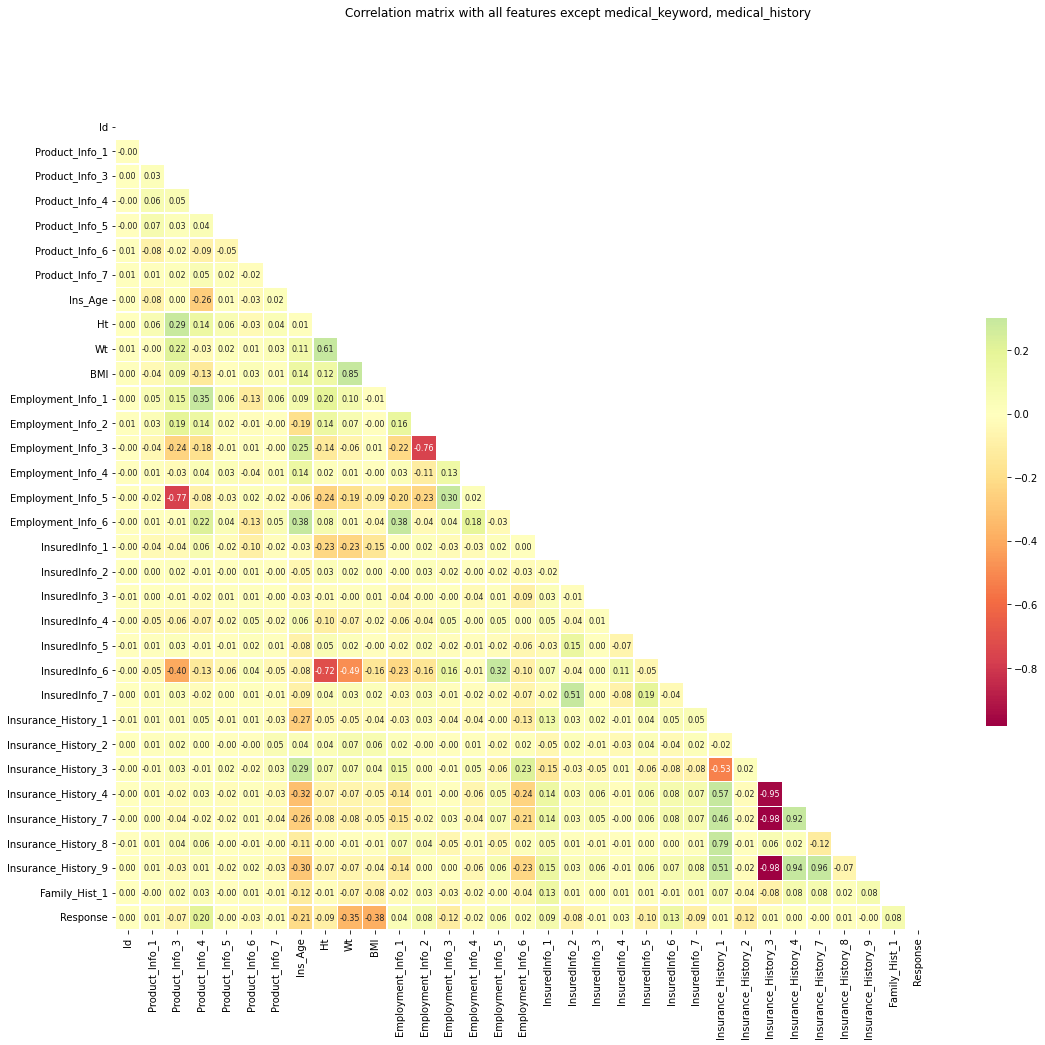

In [ ]:
#Reference documentation: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
train_corr= train_final.drop((medical_history+medical_keyword), axis=1)

correlation = train_corr.corr()
#mask the above triangle
mask = np.triu(np.ones_like(correlation,dtype='bool'))
f, ax = plt.subplots(figsize=(20, 15))
#heatmap using seaborn
sns.heatmap(correlation,mask=mask, cmap="Spectral", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,fmt=".2f", annot_kws= {"size":8})
plt.suptitle("Correlation matrix with all features except medical_keyword, medical_history")
plt.show()

In the above plot we are visualizing the correlation between different featues excluding Medical History and Medical Keyword with respect to other features and Response variable in order to understand the relationship betweem them. The green highlighted box indicates high positive correlation, red indicates high negative correlation whereas yellow indicates some positive correlation.



---
We can see that there are few features pair, which are boxes in red have High negative correlation. We can perform certain steps to remove these correlated features since these causes the problem of multicollinearty and in general don't improve the model. We can perform different techniques based on the model we are fitting, Like:
* **Combine highly correlated variables:** We can use PCA like technique to get
 the features that explains most of the variance.
* **feature reduction** this can be done greedly and as per custom threshold of
 correlation we can remove features.




#### Medical Keyword

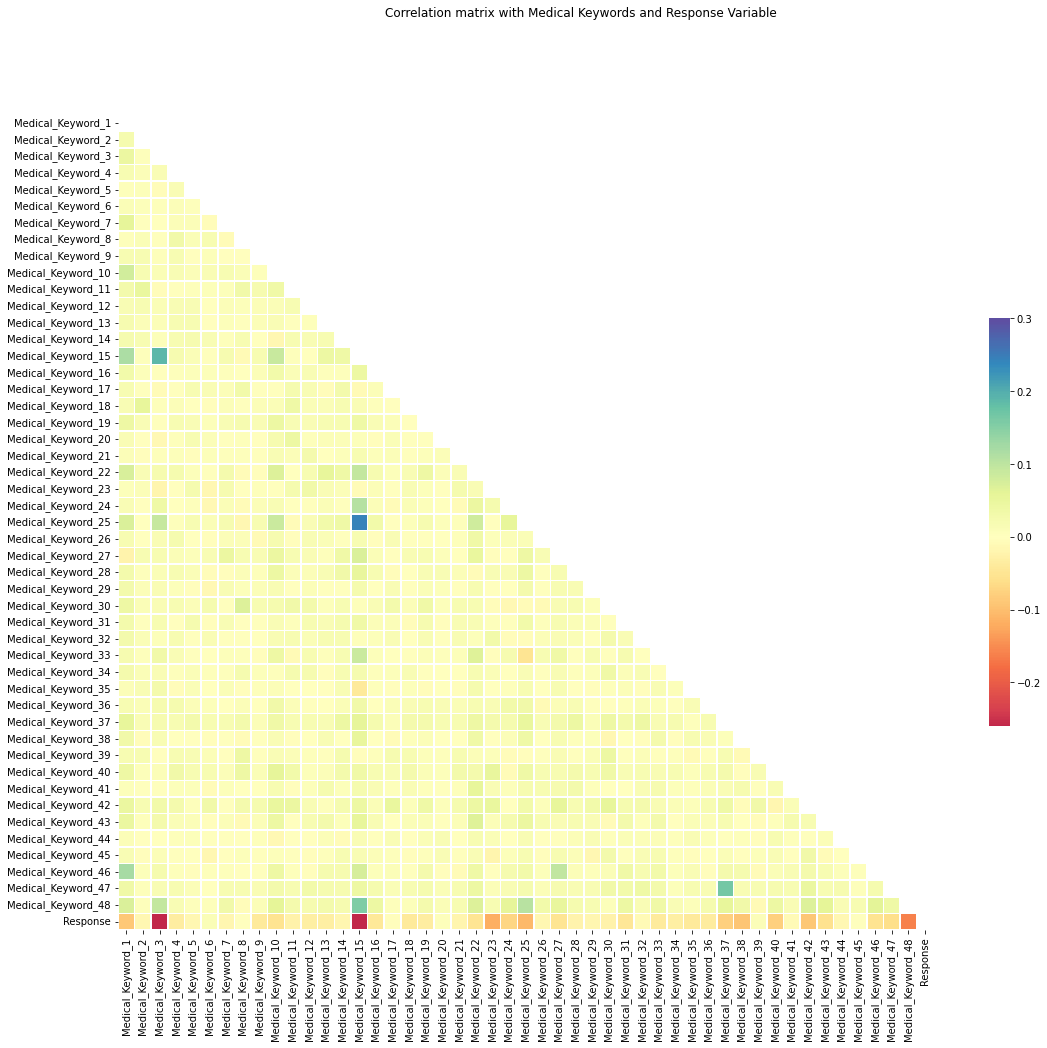

In [ ]:
#Reference documentation: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
train_corr_= train_final[medical_keyword]
# train_corr.drop('Product_Info_2_',axis=1)
train_corr_['Response']= train['Response']

correlation = train_corr_.corr()
#mask the above triangle
mask = np.triu(np.ones_like(correlation,dtype='bool'))
f, ax = plt.subplots(figsize=(20, 15))
#heatmap using seaborn
sns.heatmap(correlation,mask=mask, cmap="Spectral",vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.suptitle("Correlation matrix with Medical Keywords and Response Variable")
plt.show()

In the above plot we can see that the Response variable has very high negative correlation with Medical_Keyword_3 and Medical_keyword_15

#### Medical History

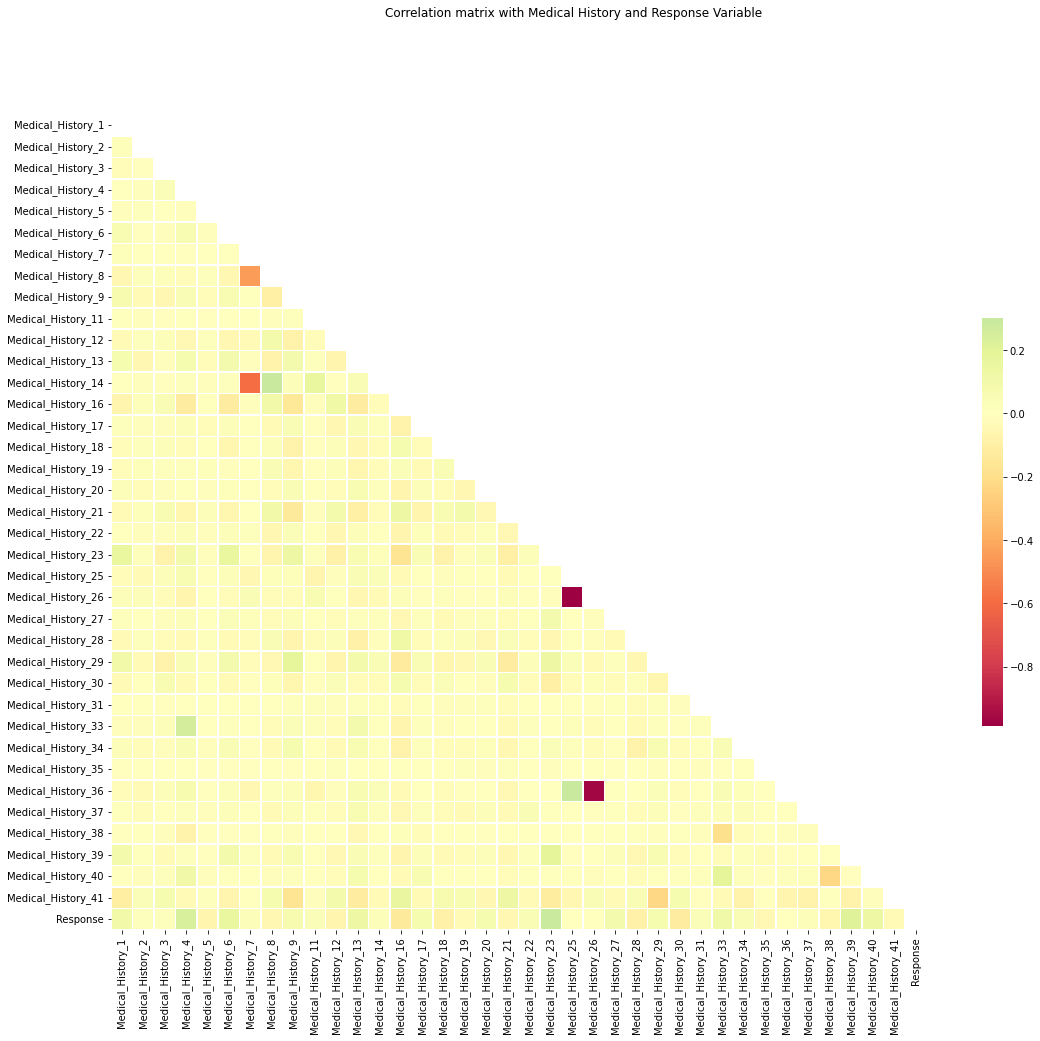

In [ ]:
#Reference documentation: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
train_corr_= train_final[medical_history]
# train_corr.drop('Product_Info_2_',axis=1)
train_corr_['Response']= train['Response']

correlation = train_corr_.corr()
#mask the above triangle
mask = np.triu(np.ones_like(correlation,dtype='bool'))
f, ax = plt.subplots(figsize=(20, 15))
#heatmap using seaborn
sns.heatmap(correlation,mask=mask, cmap="Spectral", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.suptitle("Correlation matrix with Medical History and Response Variable")
plt.show()

In the above plot showing correlation with Medical keyword and Response variables. There's high negative correlation between Medical_History_26 and 25, Medical_History_26 and 36 too.

### Univariate Analysis

#### Product Information

In [ ]:
#Product Information
print(train_final[product_info].head().to_string())
print("\n",train_final[product_info].dtypes)

       Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  Product_Info_5  Product_Info_6  Product_Info_7
38963               1             D2              26        0.384615               2               3               1
38922               1             D4              26        1.000000               2               3               1
15466               1             E1              26        0.128205               2               3               1
38282               1             B2              26        0.230769               2               3               1
36843               1             D1              10        0.230769               2               3               1

 Product_Info_1      int64
Product_Info_2     object
Product_Info_3      int64
Product_Info_4    float64
Product_Info_5      int64
Product_Info_6      int64
Product_Info_7      int64
dtype: object


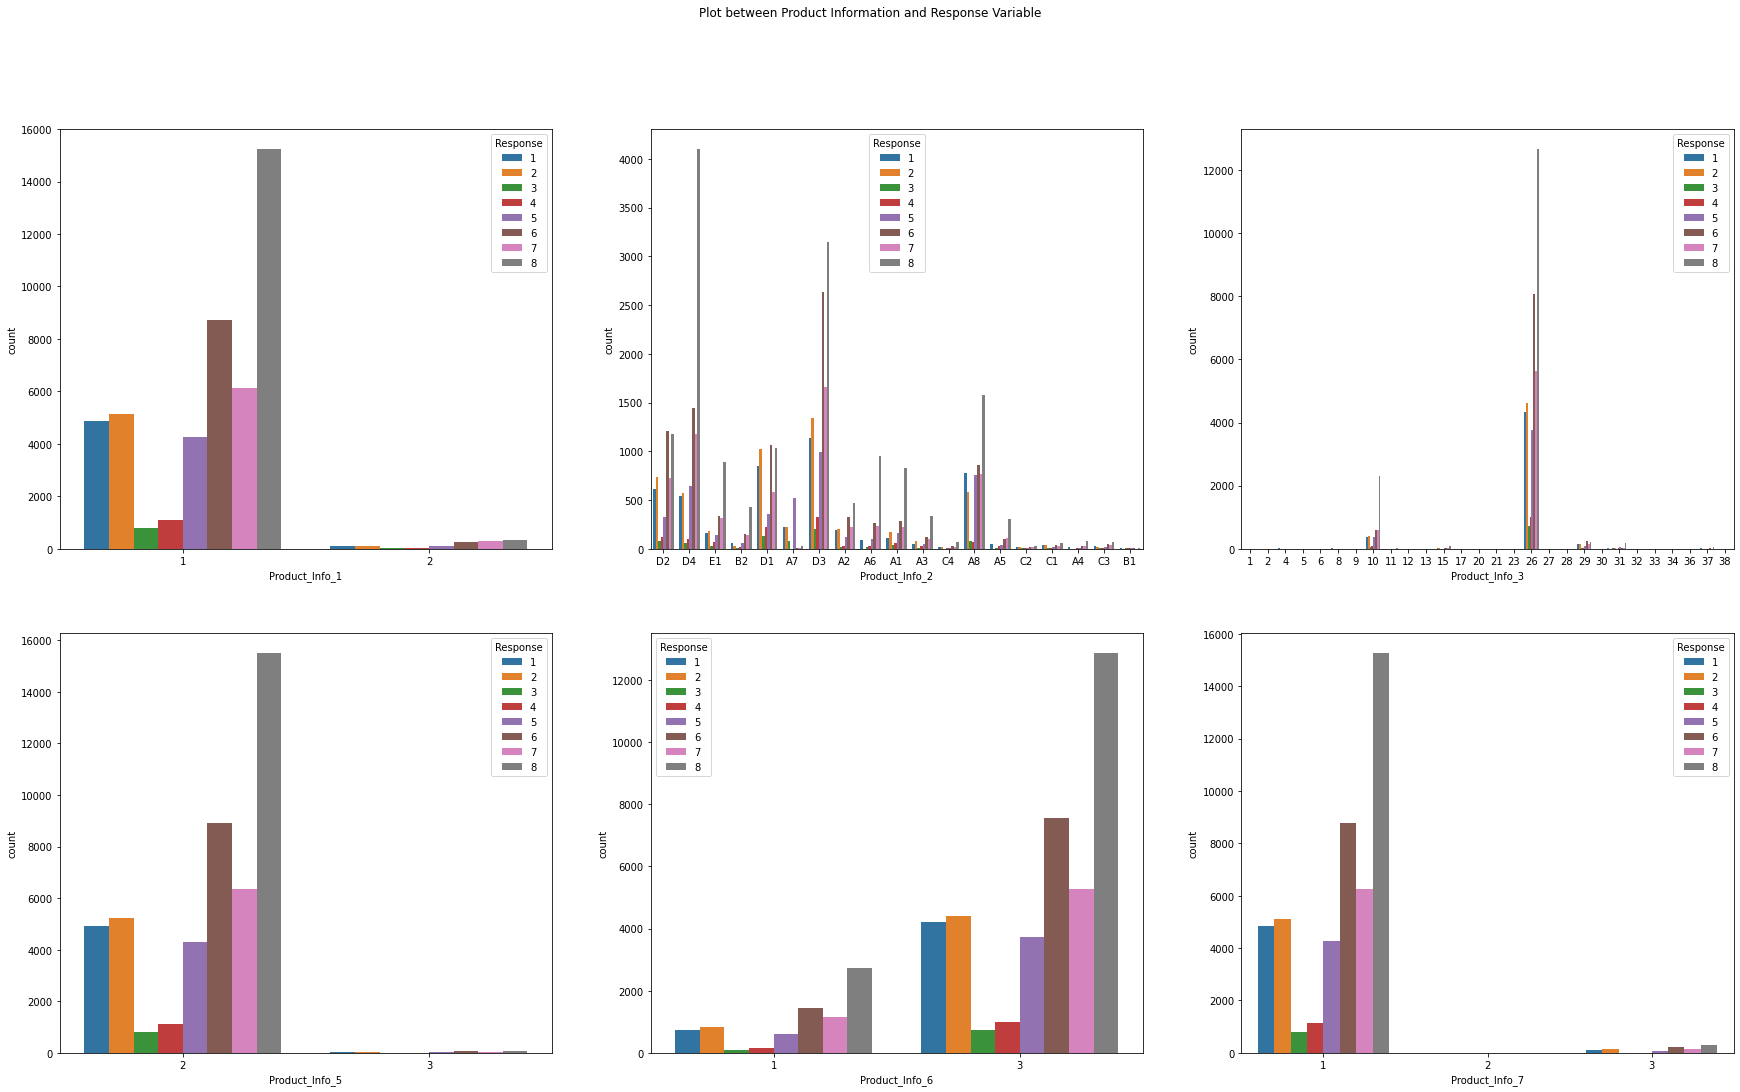

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 17))

sns.countplot(data=train_final, x="Product_Info_1", hue ="Response", ax=axs[0, 0])
sns.countplot(data=train_final, x="Product_Info_2", hue ="Response", ax=axs[0, 1])
sns.countplot(data=train_final, x="Product_Info_3", hue ="Response", ax=axs[0, 2])
# sns.distplot(x=train["Product_Info_4"],label ="Response", ax=axs[0, 3],axlabel= "Product_Info_4").

sns.countplot(data=train_final, x="Product_Info_5", hue ="Response", ax=axs[1, 0])
sns.countplot(data=train_final, x="Product_Info_6", hue ="Response", ax=axs[1, 1])
sns.countplot(data=train_final, x="Product_Info_7", hue ="Response", ax=axs[1, 2])
# fig.delaxes(axs[1,3])
fig.suptitle("Plot between Product Information and Response Variable")
plt.show()

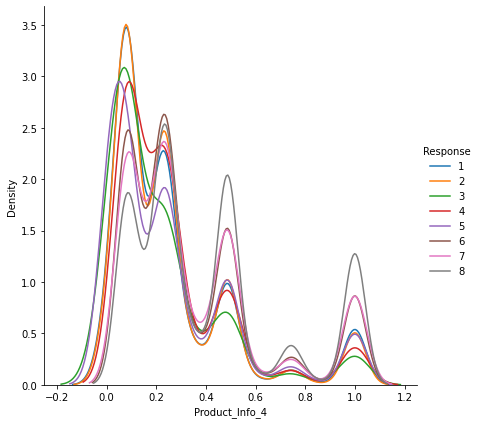

In [ ]:
train_final['Product_Info_4'] = train_final['Product_Info_4'].astype('float64')
sns.FacetGrid(data=train_final,hue="Response",height=6).map(sns.kdeplot,"Product_Info_4").add_legend()


In the above plot between Product info's and Response Variable, we can see that for almost all product data is very skewed. Like in case of Product_1, we have more than 80% of data for type=1. similarly in Product_Info7 more than 80% data is from type 1 only.  

Looking at the Product info 3, we have aroung 85% data of category 26. While for the Product_info 2 plot isn't much clear.

For Product_info4 the data is peaked around 0.0 while the distribution with respect to Response Variable is almost  overlaping for all risk levels.


#### Insured Age

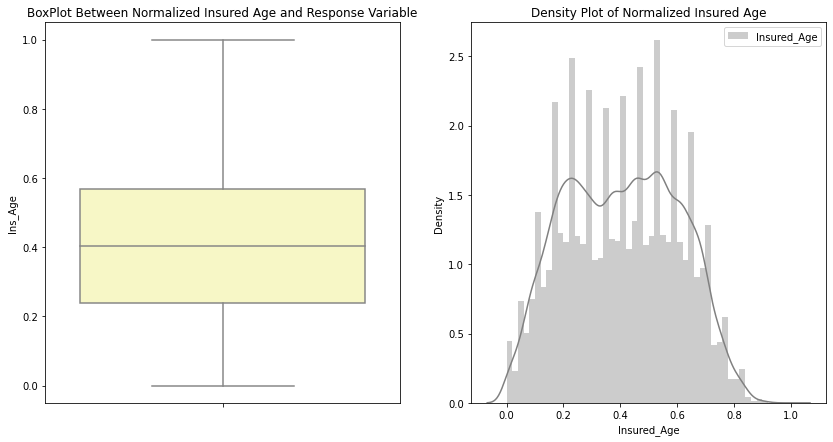

In [ ]:
# Insured Age
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.boxplot(y = "Ins_Age", hue= "Response",data=train_final, orient= "v",palette= "Spectral", ax=ax[0])
ax[0].set_title("BoxPlot Between Normalized Insured Age and Response Variable")
sns.distplot(x=train_final['Ins_Age'],label= 'Insured_Age',ax=ax[1], color= 'grey', axlabel= 'Insured_Age')
ax[1].set_title("Density Plot of Normalized Insured Age")
plt.legend()
plt.show()

 In the above plot, it can be seen that the Average Insured Age is the lowest
  for Response level 3(moderate risk) and 7(high risk). Whereas the highest
  average Age falls under Risk Level 1(i.e. lowest). 
 
 ---

 When we look at the ditribution of Insured Age only, it is normal peaked but the width is large which makes it more like block shape, hence distribution is Platykurtic. Also, more than 75% of normalizeed height is ranging between 0.2 and 0.6.  


In [ ]:
def categorize(data, variable, categories):
  first = np.quantile(data[variable], 0.25)
  second = np.quantile(data[variable], 0.75)
  category =[]
  for i in range(data[variable].shape[0]):
    if data[variable].values[i]<first:
      category.append(categories[0])
    elif (data[variable].values[i]>=first) and  (data[variable].values[i]<second):
      category.append(categories[1])
    else:
      category.append(categories[2])
  return list(category)

In [ ]:
# Categorizing Age Feature and then visualizing ## Training data
Age_train = categorize(train_final, 'Ins_Age',['young','average','old'])
print(pd.Series(Age_train).value_counts())

Age_cv = categorize(cv_final, 'Ins_Age',['young','average','old'])
Age_test = categorize(test_final, 'Ins_Age',['young','average','old'])

average    24322
old        12108
young      11074
dtype: int64


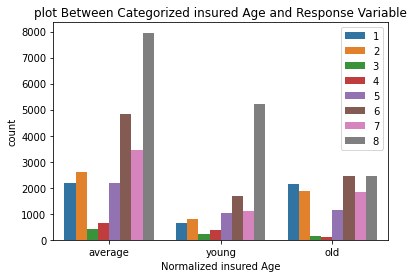

In [ ]:
sns.countplot(x =Age_train, hue=train_final['Response'].values)
plt.title("plot Between Categorized insured Age and Response Variable")
plt.xlabel("Normalized insured Age")
plt.show()

From the above plot between categorized Age and Response Variable we can infer
 that the insured with High Risk level i.e. 8 mostly have Average Age.
 
 ALso, the majority of the insured across different risk levels are of Average
 Height only. This proves that **yes there is some negative correlation between Insured Age and Risk Level**.

#### BMI

In [ ]:
train_final[(train_final['BMI']<0.8) &(train_final['BMI']>=0.2)].shape[0]/train_final['BMI'].shape[0]

0.9812857864600876

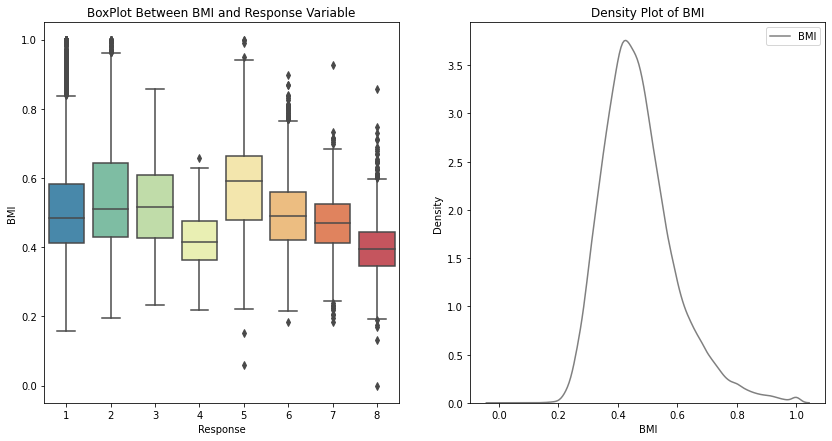

In [ ]:
# Insured BMI
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.boxplot(y = "BMI", x = "Response",data=train_final, orient= "v",palette= "Spectral_r", ax=ax[0])
ax[0].set_title("BoxPlot Between BMI and Response Variable")
sns.distplot(x=train_final['BMI'],label= 'BMI',ax=ax[1], color= 'grey', axlabel= 'BMI', hist=False)
ax[1].set_title("Density Plot of BMI")
plt.legend()
plt.show()

 In the above plot, it can be seen that the Average BMI is the lowest for
 Response level 3(moderate risk) and 7(high risk). Whereas the highest average
  BMI is for Response Category 4. 
 

---

 When we look at the ditribution of BMI only, it almost normally distributed.
 And 99% of normalized BMI values lies within range 0.2 and 0.8



In [ ]:
# Categorizing BMI Feature and then visualizing
BMI_train = categorize(train_final, 'BMI',['low','normal','high'])
print(pd.Series(BMI_train).value_counts())

BMI_cv = categorize(cv_final, 'BMI',['low','normal','high'])
BMI_test = categorize(test_final, 'BMI',['low','normal','high'])

normal    23723
high      11905
low       11876
dtype: int64


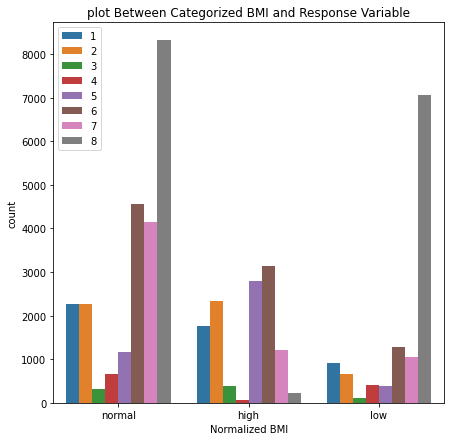

In [ ]:
plt.figure(figsize = (7,7))
sns.countplot(x =BMI_train, hue=train_final['Response'].values)
plt.xlabel("Normalized BMI")
plt.title("plot Between Categorized BMI and Response Variable")
plt.show()

From the above plot between categorized BMI and Response Variable we can infer
 that the insured with LOW BMI mostly falls under high risk level. For the
 insured with NORMAL BMI have large number of insured with high risk level.
  
  But when we look at Distribution of people with HIGH BMI they have the lowest number of insured with Risk level 4 and 8. This supports to our results which we inferred in Correlation matrix that **Response Variable and BMI have negative correlation**. 


#### Insured Height

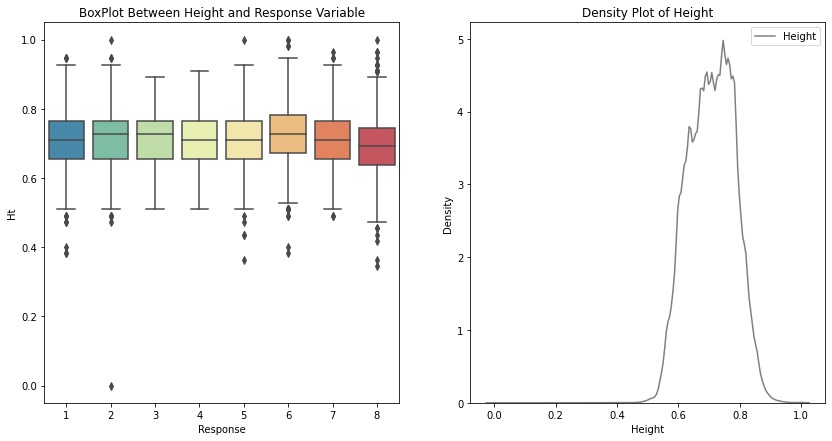

In [ ]:
# Insured Height
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.boxplot(y = "Ht", x = "Response",data=train_final, orient= "v",palette= "Spectral_r", ax=ax[0])
ax[0].set_title("BoxPlot Between Height and Response Variable")
sns.distplot(x=train_final['Ht'],label= 'Height',ax=ax[1], color= 'grey', axlabel= 'Height',hist=False, kde=True)
ax[1].set_title("Density Plot of Height")
plt.legend()
plt.show()

In [ ]:
import scipy
scipy.stats.kurtosis(train_final['Ht'])

-0.3626967757480757

 In the above plot, it can be seen that the Average height in each Response
 category is more and less same and their distributions are also similar.


---


 When we look at the ditribution of Height only, it isn't normal since the
  distribution has high peak and high breadth hence it is platykurtic.



In [ ]:
# Categorizing Height Feature and then visualizing ## Training Data
Ht_train = categorize(train_final, 'Ht',['short','average','tall'])
print(pd.Series(Ht_train).value_counts())

Ht_cv = categorize(cv_final, 'Ht',['short','average','tall'])
Ht_test = categorize(test_final, 'Ht',['short','average','tall'])

average    22452
tall       13982
short      11070
dtype: int64


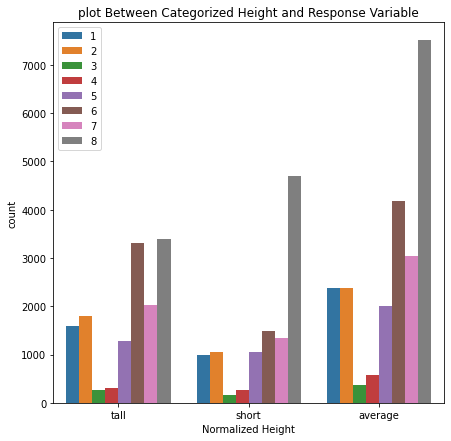

In [ ]:
plt.figure(figsize = (7,7))
sns.countplot(x =Ht_train, hue=train_final['Response'].values)
plt.title("plot Between Categorized Height and Response Variable")
plt.xlabel("Normalized Height")
plt.show()

From the above plot between Categorized Height and Response Variable we can  infer that the high Risk level insured usually have average height.

Whereas **the short and Tall Height should have high risks as compared to Average height people since they are more prone to health conditions**.



#### Weight

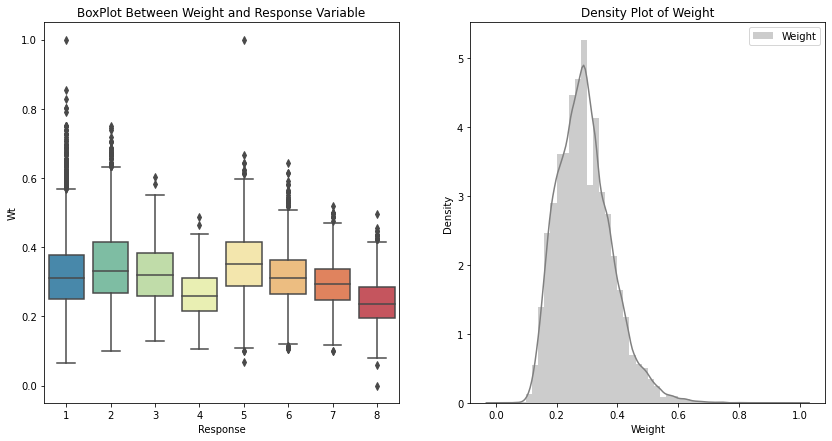

In [ ]:
# Insured WEight
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.boxplot(y = "Wt", x = "Response",data=train_final, orient= "v",palette= "Spectral_r", ax=ax[0])
ax[0].set_title("BoxPlot Between Weight and Response Variable")
sns.distplot(x=train_final['Wt'],label= 'Weight',ax=ax[1], color= 'grey', axlabel= 'Weight')
ax[1].set_title("Density Plot of Weight")
plt.legend()
plt.show()

 In the above plot, it can be seen that the Average Weight is highest in Risk
 Level 4 and lowest for Risk level 7 and 3.

---

 When we look at the ditribution of Weight only,It is more peaked and is positively skewed.


In [ ]:
scipy.stats.skew(train_final['Wt'])

0.703400987841182

In [ ]:
# Categorizing Weight Feature and then visualizing ## Training Data
Wt_train = categorize(train_final, 'Wt',['underweight','average','overweight'])
print(pd.Series(Wt_train).value_counts())

Wt_cv = categorize(cv_final, 'Wt',['underweight','average','overweight'])
Wt_test = categorize(test_final, 'Wt',['underweight','average','overweight'])

average        24732
overweight     11914
underweight    10858
dtype: int64


In [ ]:
#Storing Cateogirzed Data
categorized_features_train= pd.DataFrame()
categorized_features_train['Ht_train']= Ht_train
categorized_features_train['Age_train']= Age_train
categorized_features_train['Wt_train']= Wt_train
categorized_features_train['BMI_train']= BMI_train
categorized_features_train.index = train_final['Id']
categorized_features_train.to_csv("/content/drive/MyDrive/PrudentialData/categorized_features_train.csv")

categorized_features_cv= pd.DataFrame()
categorized_features_cv['Ht_cv']= Ht_cv
categorized_features_cv['Age_cv']= Age_cv
categorized_features_cv['Wt_cv']= Wt_cv
categorized_features_cv['BMI_cv']= BMI_cv
categorized_features_cv.index = cv_final['Id']
categorized_features_cv.to_csv("/content/drive/MyDrive/PrudentialData/categorized_features_cv.csv")

categorized_features_test= pd.DataFrame()
categorized_features_test['Ht_test']= Ht_test
categorized_features_test['Age_test']= Age_test
categorized_features_test['Wt_test']= Wt_test
categorized_features_test['BMI_test']= BMI_test
categorized_features_test.index = test_final['Id']
categorized_features_test.to_csv("/content/drive/MyDrive/PrudentialData/categorized_features_test.csv")


In [ ]:
pd.Series(Wt_train).value_counts(normalize=True)*100

average        52.062984
overweight     25.079993
underweight    22.857023
dtype: float64

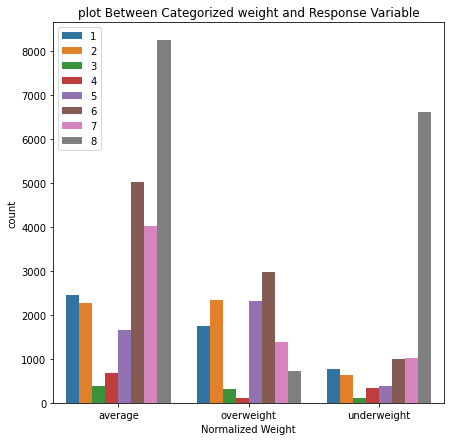

In [ ]:
plt.figure(figsize = (7,7))
sns.countplot(x =Wt_train, hue=train_final['Response'].values)
plt.title("plot Between Categorized weight and Response Variable")
plt.xlabel("Normalized Weight")
plt.show()

In the above plot between Categorized Weight and Response Variable we can infer that there are majority of insured that have average weight and that too Average weighted people are more risk prone. which shouldn't be the case.

The Overweight and underweight shows low risk level as compared to Average weight people. This **proves that there is some negative correlation between Normalized Weight and response variable**.  

#### Employment information

In [ ]:
train_final[employment_info].head()

,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6
38963,0.100,9,1,0.00,2,0.35
38922,0.060,14,1,NaN,2,0.15
15466,0.000,1,3,0.04,2,0.50
38282,0.025,9,1,0.00,2,0.00
36843,0.000,1,3,0.00,3,NaN


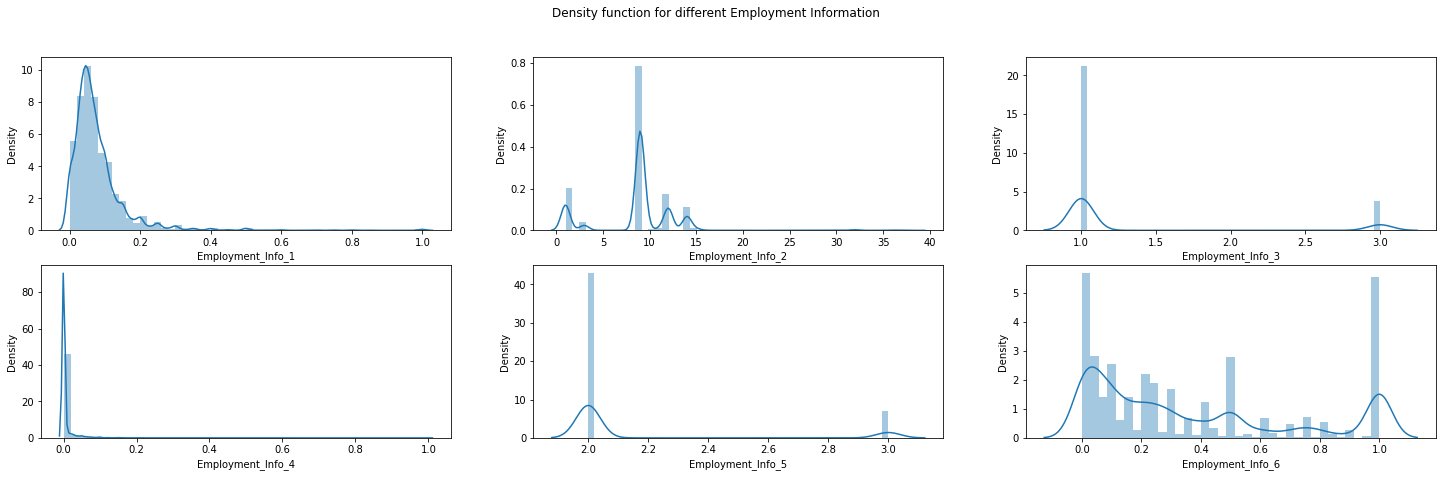

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(25, 7))

sns.distplot(x=train_final[employment_info[0]],label ="Response", ax=axs[0, 0],axlabel= "Employment_Info_1")
sns.distplot(x=train_final[employment_info[1]],label ="Response", ax=axs[0, 1],axlabel= "Employment_Info_2")
sns.distplot(x=train_final[employment_info[2]],label ="Response", ax=axs[0, 2],axlabel= "Employment_Info_3")
sns.distplot(x=train_final[employment_info[3]],label ="Response", ax=axs[1, 0],axlabel= "Employment_Info_4")
sns.distplot(x=train_final[employment_info[4]],label ="Response", ax=axs[1, 1],axlabel= "Employment_Info_5")
sns.distplot(x=train_final[employment_info[5]],label ="Response", ax=axs[1, 2],axlabel= "Employment_Info_6")

fig.suptitle("Density function for different Employment Information")
plt.show()

From the above plot, we can infer that except Employment_Info_6 all other
 employment informations other than Employment_info3 and 5 are positive skewed.
  Since Employment_info 3 and 5 are categorical, we can infer that the
   distribution of categories are imbalanced in both features. 

#### Insured Information

In [ ]:
train_final[insured_info].head()

,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7
38963,1,2,11,3,1,1,1
38922,1,2,4,3,1,1,1
15466,1,2,3,3,1,2,1
38282,1,2,6,3,1,2,3
36843,1,2,8,3,1,2,1


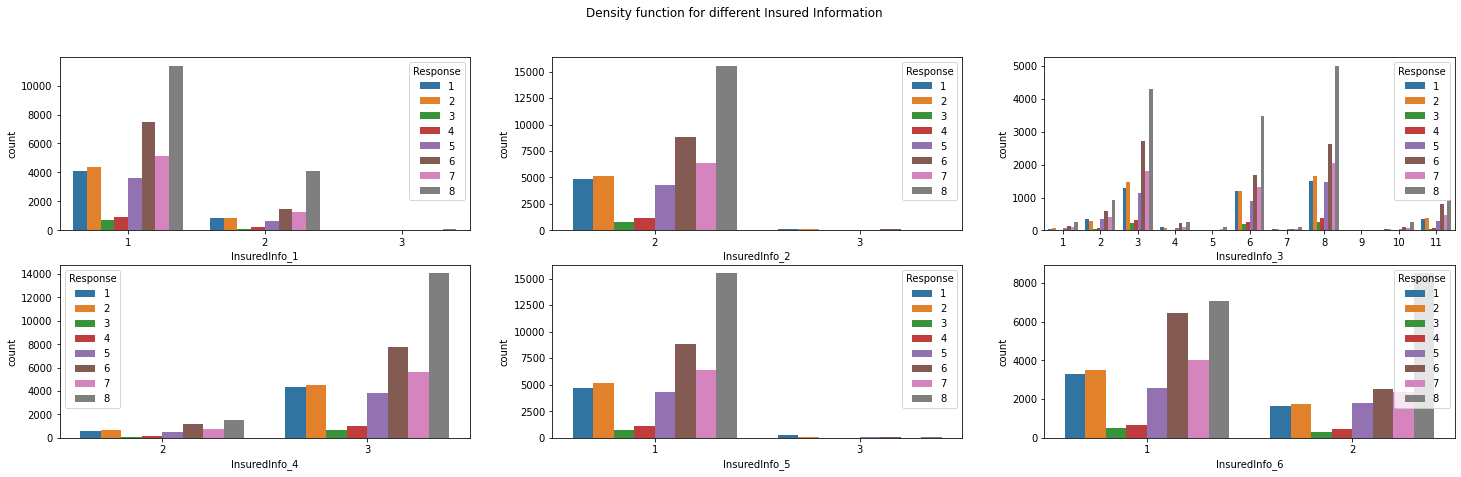

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(25, 7))

sns.countplot(x=train_final[insured_info[0]],hue= train_final["Response"], ax=axs[0, 0])
sns.countplot(x=train_final[insured_info[1]],hue= train_final["Response"], ax=axs[0, 1])
sns.countplot(x=train_final[insured_info[2]],hue= train_final["Response"], ax=axs[0, 2])
sns.countplot(x=train_final[insured_info[3]],hue= train_final["Response"], ax=axs[1, 0])
sns.countplot(x=train_final[insured_info[4]],hue= train_final["Response"], ax=axs[1, 1])
sns.countplot(x=train_final[insured_info[5]],hue= train_final["Response"], ax=axs[1, 2])

fig.suptitle("Density function for different Insured Information")
plt.show()

In the above plot we can see that Insured Info 1-6 which are all categorical , all seems to have imbalanced distribution of categories. Not much can be inferred except the distribution of categories since the categories and information are self Anonymous.

**FEature Mapping function**

In [ ]:
def feature_mapping(x,y, data):
  '''
  
  feature_mapping(feature[0] <string>, feature[1]<string>,data <dataframe>)
  
  Return: <dict>
  **feature1_category : mapped_feature_category**

  This function checks for the features category mapping to other feature category
  Like: let's say a column has the categories A, B, and C. And another column have categories X, Y, and Z.
   Although the values are different, they could have the same mapping,
    ie row with value A always occur with row value X, and so on. 
    '''
  featuremap= {}
  for i in data[x].value_counts().keys():
    for j in data[y].value_counts().keys():

      #printing all categories present in rows other than rows with A's ith category
      # features = np.unique(data[data[x]!=i][y])
      
      #checking shape of A's ith category and B's jth category and further checking rows other than a's ith category don't contain j
      if (data[data[x]==i].shape[0] == data[data[y]==j].shape[0]):
        if all(data[data[x]==i][y] == j) & (j not in data[data[x]!=i][y].values):
            print("Feature {0} category {1} occurs only when feature {2} category {3} is opted".format(x, i, y, j))

In [ ]:
#Example
df= pd.DataFrame()
df['x'] = np.zeros(15)
df['x'][0:5]= 1
df['y'] = np.ones(15)
df['y'][0:5]= 0
df['y'][2] =2

df.head()
feature_mapping('x','y',df)

Feature x category 0.0 occurs only when feature y category 1.0 is opted


**checking feature mapping**

In [ ]:
#checking feature mapping in insured_info
from tqdm import trange
length = len(insured_info)
# print(length)

for i in trange(length):
    if(i+1) <=6:
      feature_mapping(insured_info[i],insured_info[i+1], train_final)

100%|██████████| 7/7 [00:01<00:00,  6.19it/s]


None of the insured information feature have their categories mapped to other feature categories. 




#### Family History

In [ ]:
print(train_final['Family_Hist_1'].head())

38963    3
38922    3
15466    3
38282    3
36843    3
Name: Family_Hist_1, dtype: int64


<Figure size 720x360 with 0 Axes>

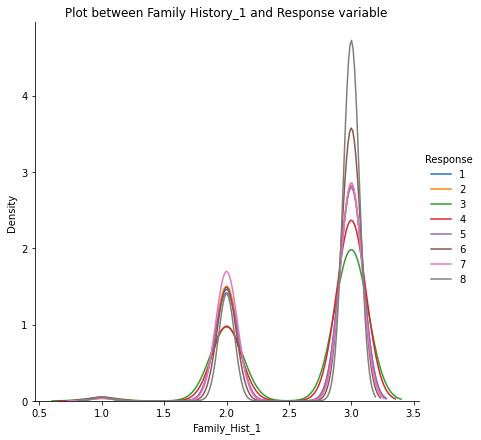

In [ ]:
plt.figure(figsize=(10, 5))
# sns.distplot(x=train[family_history[0]],label =np.unique(train[family_history[0]]),axlabel= "Family_history_1")
sns.FacetGrid(data=train_final,hue="Response",height=6).map(sns.kdeplot,"Family_Hist_1").add_legend()
plt.title("Plot between Family History_1 and Response variable")
plt.show()

from the above plot between family_history_1 and Response variable the Risk Level 8 is more peaked in all categories of Family_history_1.

Also the distribution of Categories are imbalanced.

#### Medical Keyword

**`Checking Feature Mapping`**

In [ ]:
#checking feature mapping in medical_keywords
from tqdm import trange
length = len(medical_keyword)

for i in trange(length):
  for j in range(length):
    if i!=(j):
      feature_mapping(medical_keyword[i], medical_keyword[j], train_final)
      # print("checking for feature mapping between {0} and {1}",(medical_keyword[i], medical_keyword[i+1]))
      

100%|██████████| 48/48 [02:48<00:00,  3.51s/it]


None of the medical keyword feature have their categories mapped to other feature categories. 




#### Medical History

**Feature Mapping in Medical_History** 

In [ ]:
#checking feature mapping in medical_history
from tqdm import trange
length = len(medical_history)
medical_history_featuremap =[]
for i in trange(length):
    if(i+1) <=36:
      feature_mapping(medical_history[i], medical_history[i+1], train_final)

  0%|          | 0/37 [00:00<?, ?it/s]

Feature Medical_History_1 category 223.0 occurs only when feature Medical_History_2 category 389 is opted


100%|██████████| 37/37 [05:24<00:00,  8.76s/it]


In [ ]:
train_final[train_final['Medical_History_1']==223]

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
13453,17875,1,D3,26,0.076923,2,3,1,0.552239,0.763636,0.299163,0.428189,0.039,9,1,NaN,2,0.01,1,2,11,3,1,1,1,2,1,1,3,3,2,3,3,223.0,389,2,2,1,3,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


Only Medical_History_1 has a category 223 which occurs when medical_history_2 category 389 is opted or vise versa. 

The occurence of category 223/ 389 is only once so this analysis isn't helpful.

In [ ]:
#checking for Medical_History columns with more than 80% bias
medical_history = [i for i in medical_history if i not in columns_dropped]

high_bias_medical_history= []
for i in range(len(medical_history)):

  if any((train_final[medical_history[i]].value_counts()/train_final.shape[0]).values>0.8):
    high_bias_medical_history.append(medical_history[i])

print(high_bias_medical_history)
print("total medical_history features with high bias (greater than 80% of single category present: {:2.2%}".format(len(high_bias_medical_history)/len(medical_history)))


['Medical_History_3', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40']
total medical_history features with high bias (greater than 80% of single category present: 78.38%


The above analysis on Medical History features have approx 78% of the columns with more than 80% singe category could be due to intrinsic property of the feature which makes the insured enter the information much related to each other. 

#### Visualising/Analysing the Correlated Features

 

In [ ]:
### Highly negative Correlated features , we'll remove these features
#Feature insuranceHistory_3 has high negative correlation with Insurance_History_4, 9 and 7
train_final[['Insurance_History_3','Insurance_History_4','Insurance_History_7',
            'Insurance_History_9']].corr().style.background_gradient("Blues")

,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_9
Insurance_History_3,1.000000,-0.948967,-0.975067,-0.983123
Insurance_History_4,-0.948967,1.000000,0.918893,0.938355
Insurance_History_7,-0.975067,0.918893,1.000000,0.962879
Insurance_History_9,-0.983123,0.938355,0.962879,1.000000


We can see that the feature **Insurance_History_3 has high negative correlation with Insurance_History_4, 7 and 9**. Hence we will remove Insurance_history_3  from our analysis.

Correlation coefficient between Product_info_3 and Employment_info_5:  (-0.769692754727552, 0.0)


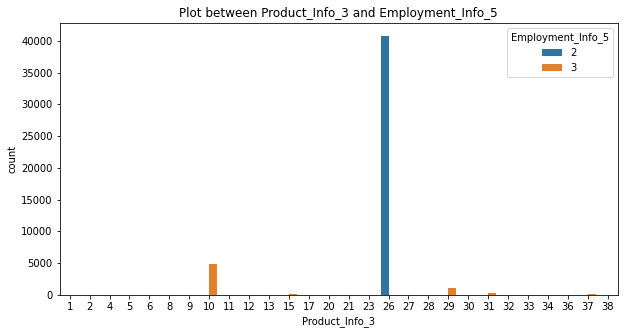

In [ ]:
### replacing **Product_Info_3 and Employee_Info_5**
fig, ax= plt.subplots(figsize=[10,5])
sns.countplot(x = train_final['Product_Info_3'],hue=train_final['Employment_Info_5'])
plt.title("Plot between Product_Info_3 and Employment_Info_5")
print("Correlation coefficient between Product_info_3 and Employment_info_5: ",
      stats.pearsonr(train_final['Product_Info_3'], train_final['Employment_Info_5']))

We can see that the Correlation between **Product_info_3 and Employment_Info_5 is significantly high **and hence we would eliminate these both features and consider the product of them instead.

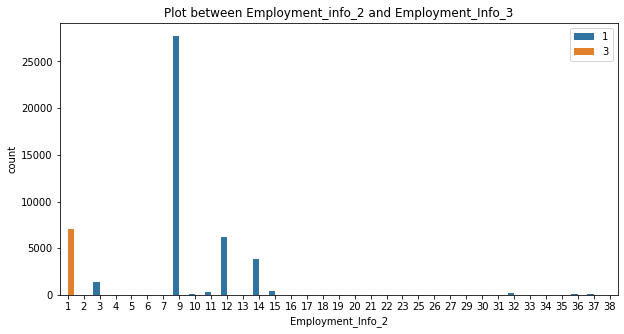



Correlation coefficient between Employment_Info_3 and Employment_info_2:  (-0.7595580021160209, 0.0)


In [ ]:
#feature Employment_Info_2 and Employment_Info_3
fig, ax=plt.subplots(figsize= [10,5])
fig= sns.countplot(x= train_final['Employment_Info_2'],hue =train_final['Employment_Info_3'])
plt.title("Plot between Employment_info_2 and Employment_Info_3")
fig.legend(loc='upper right')
plt.show()
print("\n\nCorrelation coefficient between Employment_Info_3 and Employment_info_2: ",
      stats.pearsonr(train_final['Employment_Info_3'], train_final['Employment_Info_2']))

In [ ]:
feature_mapping('Employment_Info_2','Employment_Info_3',train_final)

Feature Employment_Info_2 category 1 occurs only when feature Employment_Info_3 category 3 is opted


We have noticed that the *Feature Employment_Info_2 category 1 occurs only when feature Employment_Info_3 category 3 is opted* Hence, we'll eliminate Employment_info_2 and 3 from our analysis and add a feature to map the co-occurence of both.

Correlation between Ht and insured_info_6:  SpearmanrResult(correlation=-0.7321510383786035, pvalue=0.0) 




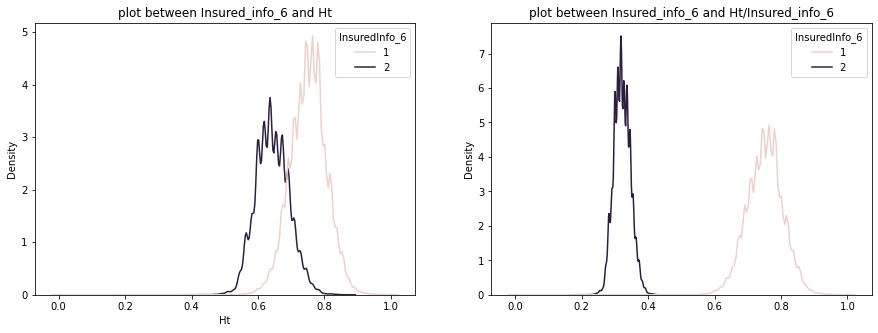

In [ ]:
# Ht feature is correlated with insured info_6 and have overlapping distributions
# we will remove insured_info6 and Ht from our analysis and add another feature which is Ht/insured_info6
fig, ax =plt.subplots(1,2,figsize=[15,5])
sns.kdeplot(train_final['Ht'], hue=train_final['InsuredInfo_6'],ax=ax[0])
ax[0].set_title("plot between Insured_info_6 and Ht")
sns.kdeplot(train_final['Ht']/train_final['InsuredInfo_6'], hue=train_final['InsuredInfo_6'],ax=ax[1])
ax[1].set_title("plot between Insured_info_6 and Ht/Insured_info_6")

print("Correlation between Ht and insured_info_6: ",stats.spearmanr(train_final['InsuredInfo_6'], train_final['Ht']),"\n\n")


In [ ]:
## MEdical History 25, Medical_History_26, and Medical_History_36
train_final[['Medical_History_25','Medical_History_26','Medical_History_36']].corr().style.background_gradient("Blues")

,Medical_History_25,Medical_History_26,Medical_History_36
Medical_History_25,1.000000,-0.987966,0.954115
Medical_History_26,-0.987966,1.000000,-0.965187
Medical_History_36,0.954115,-0.965187,1.000000


As, we can see the correlation matrix between Medical_history_25, Medical_history_26 and Medical_history_36 features.There is **high negative correlation** between them. This could be due to the intrinsic property of feature. We won't make changes to these. 

In [20]:
#Saving Train_final and test_final datasets which has highly missing data columns dropped.

rawdatasplitwithoutmissingvalues = open('/content/drive/MyDrive/PrudentialData/rawdatasplitwithoutmissingvalues','wb') 
pickle.dump((train,cv, test),rawdatasplitwithoutmissingvalues)
rawdatasplitwithoutmissingvalues.close()

# prudential_files= open('/content/drive/MyDrive/PrudentialData/prudential_files', 'rb')
# prudential_files= open(os.getcwd()+'/prudential_files', 'rb')
# train_final,cv_final, test_final= pickle.load(prudential_files)